In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

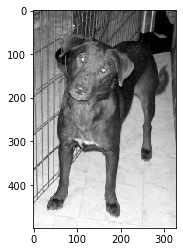

In [2]:
dataDir = "F:/Dataset/dogs-cats-images/dataset/training_set/"
categories = ["dogs", "cats"]

for categ in categories:
    path=os.path.join(dataDir,categ)#combines the path
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
    

In [3]:
img_array.shape

(499, 327)

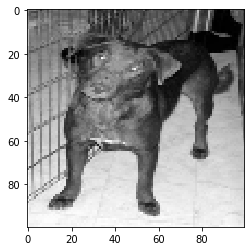

In [15]:
img_size = 100
new_img_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_img_array,cmap="gray")
plt.show()
# for n_img in new_img_array:
#     print(n_img)
    

In [222]:
#================================================code starts from here ====================================================
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
training_data=[]
dataDir = "F:/Dataset/dogs-cats-images/dataset/training_set/"
categories = ["dogs", "cats"]
img_size = 100
def prepare_training_data():
    for categ in categories:
        path=os.path.join(dataDir,categ)#combines the path
        classi_num = categories.index(categ)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array,(img_size,img_size))
            training_data.append([new_img_array,classi_num])
prepare_training_data()

8000

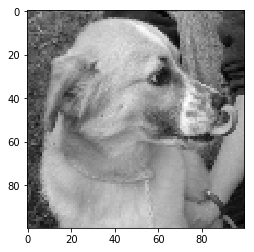

In [223]:
v1=training_data[511][0]
plt.imshow(training_data[511][0],cmap="gray")
len(training_data)

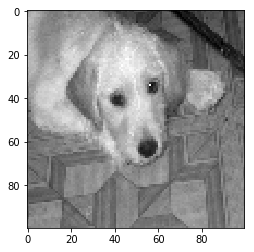

In [224]:
#To make the network learn efficiently we have to shuffle

import random
random.shuffle(training_data)



plt.imshow(training_data[8][0],cmap="gray")


In [225]:
# we have to separate training data and the target
X = []
y = []
for feature,label in training_data:
    X.append(feature)
    y.append(label)
X = np.array(X).reshape(-1,img_size,img_size,1)

In [226]:
X.shape[1:]

(100, 100, 1)

In [227]:
#saving the training the data set ................ i.e X and y

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [228]:
Z=[]
pickle_in = open("X.pickle","rb")
X=pickle.load(pickle_in)
X[0].shape

(100, 100, 1)

In [229]:
#===============================================deeplearning code=====================================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

X = pickle.load(open("X.pickle","rb"))
Y = pickle.load(open("y.pickle","rb"))


In [230]:
# Normalizing

X = X/255.0

model = Sequential()

model.add(Conv2D(16,(3,3),input_shape=(100,100,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(200))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))




In [231]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)        

In [232]:
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"] )

In [233]:
#training the dataset

model.fit(X,y,batch_size=4,epochs=20,validation_split=0.1)

Train on 7200 samples, validate on 800 samples
Epoch 1/20
7200/7200 [==============================] - 106s 15ms/sample - loss: 0.6677 - acc: 0.5817 - val_loss: 0.6457 - val_acc: 0.6050
Epoch 2/20
7200/7200 [==============================] - 108s 15ms/sample - loss: 0.6086 - acc: 0.6751 - val_loss: 0.5794 - val_acc: 0.7025
Epoch 3/20
7200/7200 [==============================] - 109s 15ms/sample - loss: 0.5534 - acc: 0.7232 - val_loss: 0.5503 - val_acc: 0.7088
Epoch 4/20
7200/7200 [==============================] - 111s 15ms/sample - loss: 0.5107 - acc: 0.7554 - val_loss: 0.5101 - val_acc: 0.7688
Epoch 5/20
7200/7200 [==============================] - 111s 15ms/sample - loss: 0.4636 - acc: 0.7822 - val_loss: 0.4840 - val_acc: 0.7850
Epoch 6/20
7200/7200 [==============================] - 113s 16ms/sample - loss: 0.4218 - acc: 0.8076 - val_loss: 0.4738 - val_acc: 0.7650
Epoch 7/20
7200/7200 [==============================] - 112s 16ms/sample - loss: 0.3824 - acc: 0.8310 - val_loss: 0.550

In [234]:
model.save("catsAndDogs")

In [235]:
new_model = tf.keras.models.load_model("catsAndDogs")

In [236]:
#loadinng dataset to testing my model

X_test=[]
categ=["dogs","cats"]
for cate in categ:
    path = os.path.join("F:/Dataset/dogs-cats-images/dataset/training_set/",cate)
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        r_image = cv2.resize(image,(img_size,img_size))
        X_test.append(r_image)


8000

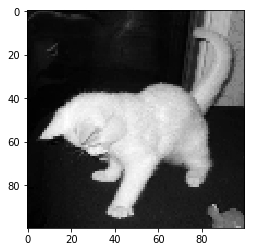

In [237]:
random.shuffle(X_test)
plt.imshow(X_test[1000],cmap="gray")
len(X_test)

In [238]:

X_test_np = np.array(X_test).reshape(-1,img_size,img_size,1)


In [239]:
output = new_model.predict([X_test_np])

DOG


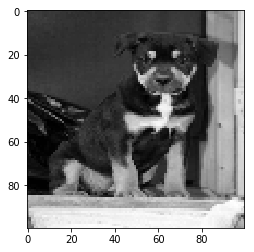

In [254]:
i=7010
if output[i][0] == 0.0:
    print("DOG") 
else:
    print("CAT")
plt.imshow(X_test[i],cmap="gray")